In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets.samples_generator import make_blobs

In [2]:
%run kmeans

Kmeans is an unsupervised algorithm that seeks to learn an optimal division or discrete labelling of a group of points.

Lets demonstrate it with some fake data.

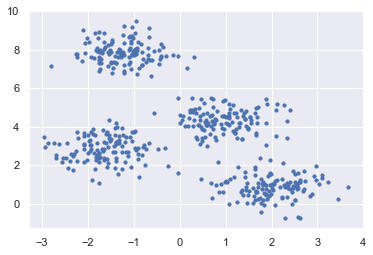

In [3]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10);

Visually, we see that the generated data has 4 clusters. Now lets see that kmeans tells us.

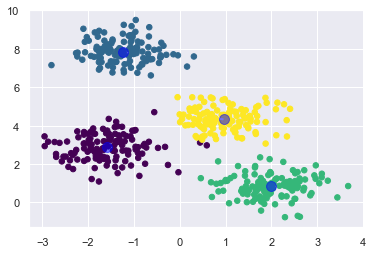

In [4]:
centroids, clusters = kmeans(X, k=4, centroids='kmeans++')
row_index = [y for x in clusters for y in x]
cluster_no = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        cluster_no.append(cluster_idx)
plt.scatter(X[row_index, 0], X[row_index, 1], c= cluster_no, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=100, alpha=0.5)

Kmeans identifies the centroids and groups together data points on the basis of some similarity measure (euclidian distance in this case).

Also, we see that there is randomness associated with how kmeans selects clusters. Every iteration gives us slightly different results.

However, Kmeans is limited to linear cluster boundaries. Lets see how it performs for clusters with non linear boundaries.

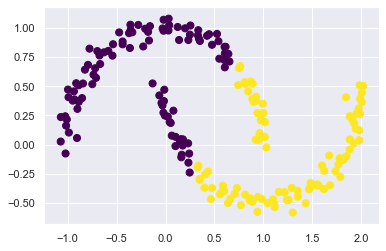

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
centroids, clusters = kmeans(X, k=2, centroids='kmeans++')
row_index = [y for x in clusters for y in x]
cluster_no = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        cluster_no.append(cluster_idx)
plt.scatter(X[row_index, 0], X[row_index, 1], c=cluster_no, s=50, cmap='viridis');

Kernel Methods that project data onto a higher dimension work much better for such datasets.

### Kmeans for Image compression

Kmeans can also be used to compress images by bringing down the number of colours used.

I am a big fan of Roger Federer. He is an abosulte masterclass of the game and a big time inspiration for me personally. Lets have some fun with his photos.

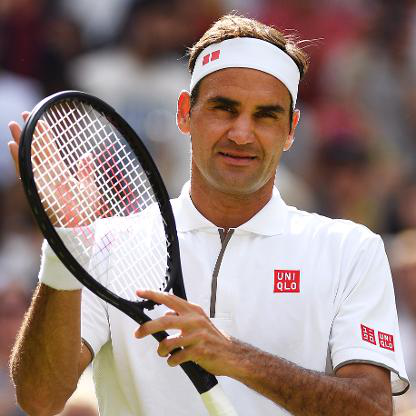

In [6]:
path = 'images/roger_federer.jpg'
Image.open(path)

Now lets see the shape of these images.

In [7]:
im = Image.open(path)
#im = im.convert('L')
np_im = np.array(im)
print(np_im.shape)

(416, 416, 3)


An image is represented as 3 seperate matrices for colours Red / Blue / Green and their contributions are stored as integers from 0 to 255.

In [8]:
np.max(np.max(np_im, axis=1), axis=0)

array([255, 255, 255], dtype=uint8)

I will convert it into grey scale for ease of use. Also, its required to reshape the image matrix into a 2-D array.

In [9]:
data = np_im.reshape(np_im.shape[0] * np_im.shape[1],np_im.shape[2]) #/ 255 ## rescale 0-255 to 0-1
data.shape

(173056, 3)

We see that there are a total of > 500,000 colours used to describe this image. Lets reduce it down to 20 colours and see how that looks.

In [10]:
k = 10
centroids, clusters = kmeans(data, k=k, centroids='kmeans++')

In [11]:
## get transformed matrix for image
new_colours = data.copy()
for cluster_no, row_indexes in enumerate(clusters):
    new_colours[row_indexes, :] = centroids[cluster_no]

Text(0.5, 1.0, '10-color Image')

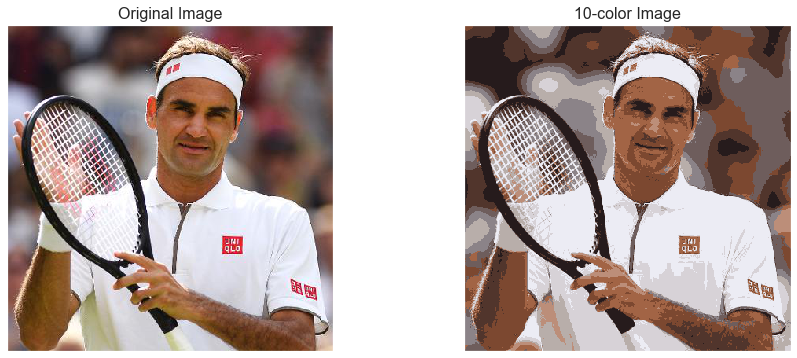

In [12]:
## plot recoloured and original image
im_recolored = new_colours.reshape(np_im.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(im_recolored)
ax[1].set_title(f'{k}-color Image', size=16)

Also lets change the no of colours ( i.e. clusters) and see how the image looks like.

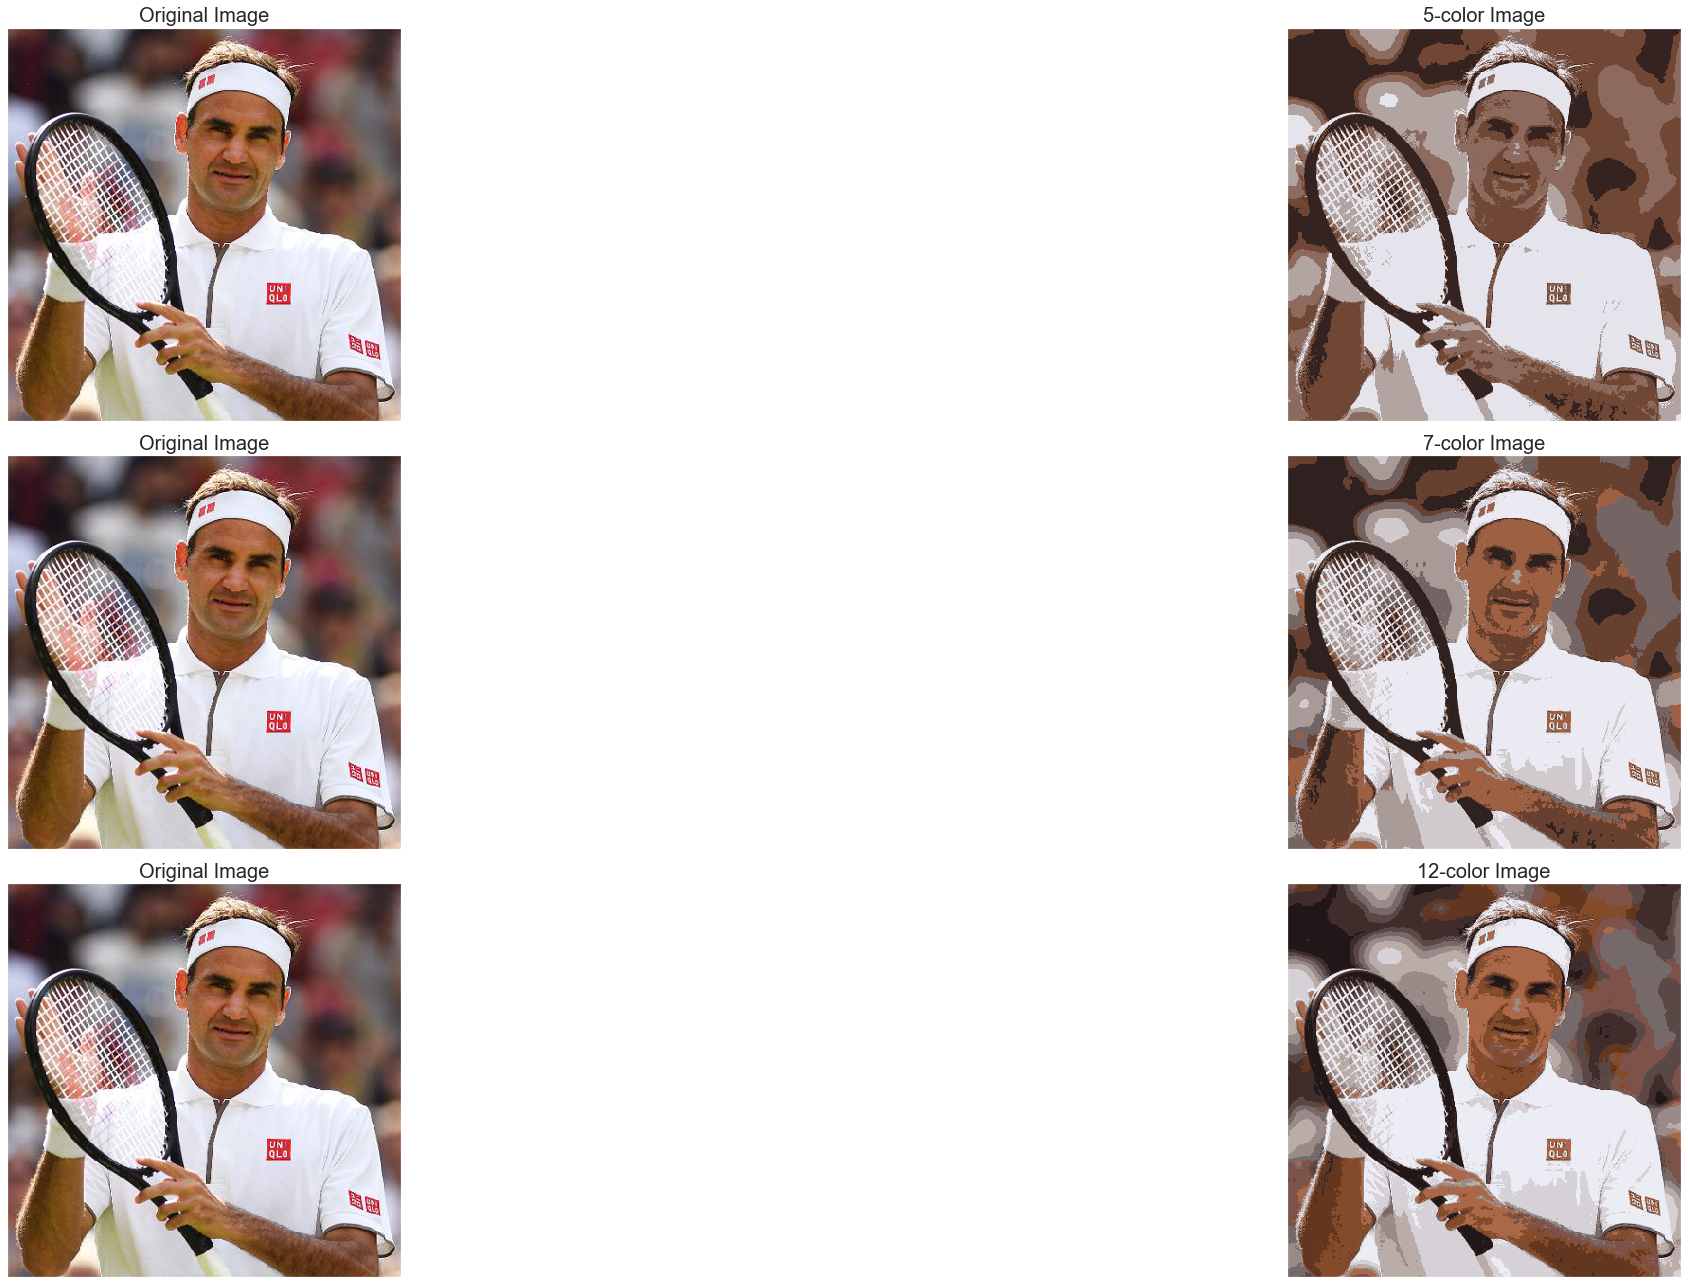

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(60, 18), subplot_kw=dict(xticks=[], yticks=[]))
for idx, no_colours in enumerate([5,7,12]):
    centroids, clusters = kmeans(data, k=no_colours, centroids='kmeans++')
    new_colours = data.copy()
    for cluster_no, row_indexes in enumerate(clusters):
        new_colours[row_indexes, :] = centroids[cluster_no]
    im_recolored = new_colours.reshape(np_im.shape)
    ax[idx, 0].imshow(im)
    ax[idx, 0].set_title('Original Image', size=20)
    ax[idx, 1].imshow(im_recolored)
    ax[idx, 1].set_title(f'{no_colours}-color Image', size=20)
    plt.tight_layout()

### More Fun Stuff to Explore

Spectral clustering : implementation and similarity metrics

Breiman's Proximity matrix from random forests